In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Dense, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [3]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/research data2/'
all_files = os.listdir(dataset_path)
dataframes = [pd.read_csv(dataset_path + file) for file in all_files if file.endswith('.csv')]

# Combine the dataset from multiple CSV files
data = pd.concat(dataframes, ignore_index=True)
data2=data

<ipython-input-4-8dd27318f0aa>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(dataset_path + file) for file in all_files if file.endswith('.csv')]
<ipython-input-4-8dd27318f0aa>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(dataset_path + file) for file in all_files if file.endswith('.csv')]
<ipython-input-4-8dd27318f0aa>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(dataset_path + file) for file in all_files if file.endswith('.csv')]
<ipython-input-4-8dd27318f0aa>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(dataset_path + file) for file in all_files if file.endswith('.csv')]
<ipython-input-4-8dd27318f0aa>:4: DtypeWarning: Columns (85) have mixed 

In [5]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364520,317398,192.168.50.9-31.13.80.36-44304-443-6,192.168.50.9,44304,31.13.80.36,443,6,2018-11-03 12:37:00.711502,407677,88,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,0,BENIGN
20364521,286894,192.168.50.8-8.8.8.8-60481-53-17,192.168.50.8,60481,8.8.8.8,53,17,2018-11-03 12:37:00.730301,45201,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,0,BENIGN
20364522,2665,192.168.50.9-31.13.80.12-46518-443-6,31.13.80.12,443,192.168.50.9,46518,6,2018-11-03 12:37:00.788605,182,1,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,BENIGN
20364523,2666,192.168.50.9-31.13.80.12-46518-443-6,192.168.50.9,46518,31.13.80.12,443,6,2018-11-03 12:37:00.788788,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,0,BENIGN


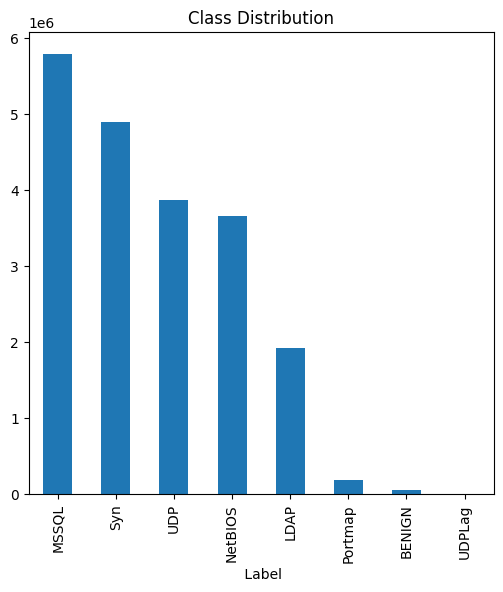

In [10]:
# Attack category distribution
plt.figure(figsize=(6, 6))
data[' Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [ ]:
# Identify non-numeric columns and encode them
non_numeric_cols = data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder().fit(data[col]) for col in non_numeric_cols}

for col, encoder in label_encoders.items():
    data[col] = encoder.transform(data[col])